In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from IPython.display import display

In [24]:
#Testing with Average Daily Exceedance Flow Equation
def CCDF_aug_avg_daily_exceedance_flow(file_name):

    df = pd.read_csv(file_name + ".csv")

    # df['date_column'] = pd.to_datetime(df['date_column'])

    # # Filter the DataFrame to only include rows where the month is August
    # august_data = df[df['date_column'].dt.month == 8].copy()

    # df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d')

    # # Filter the DataFrame to only include rows where the month is August
    # august_data = df[df['Datetime'].dt.month == 8]

    df[["Year", "Month", "Day"]] = df["Datetime"].str.split("-", expand=True)

    august_data = df[df["Month"] == '08'].copy()

    august_data['ranked_column_m'] = august_data['Mean_CFS'].rank(method='first', ascending=False)

    august_data['row_number'] = range(1, len(august_data) + 1)

    august_data['P_vals'] = float('nan')

    n = len(august_data)

    for index, row in august_data.iterrows():
        P = 100 * ((row['ranked_column_m'])/(n + 1))
        august_data.at[index, 'P_vals'] = P

    #print(august_data)
    print(august_data['P_vals'])

    august_data.sort_values(by= ['Mean_CFS', 'P_vals'], ascending=False)

    plt.figure(figsize=(10, 6))
    plt.plot(august_data['P_vals'], august_data['Mean_CFS'], marker='o', linestyle='-', color='b')
    plt.xlabel('Exceedance Probability (%)')
    plt.ylabel('Mean Daily Flow (Mean_CFS)')
    plt.title('Exceedance Probability Plot for August')
    plt.grid(True)
    plt.show()

    P_value_to_find = 50
    mean_va_at_50 = np.interp(P_value_to_find, august_data['P_vals'], august_data['Mean_CFS'])

    print(mean_va_at_50)

213     67.871486
214     71.084337
215     72.690763
216     76.706827
217     75.903614
          ...    
2795    81.927711
2796    83.132530
2797    83.534137
2798    79.919679
2799    82.329317
Name: P_vals, Length: 248, dtype: float64


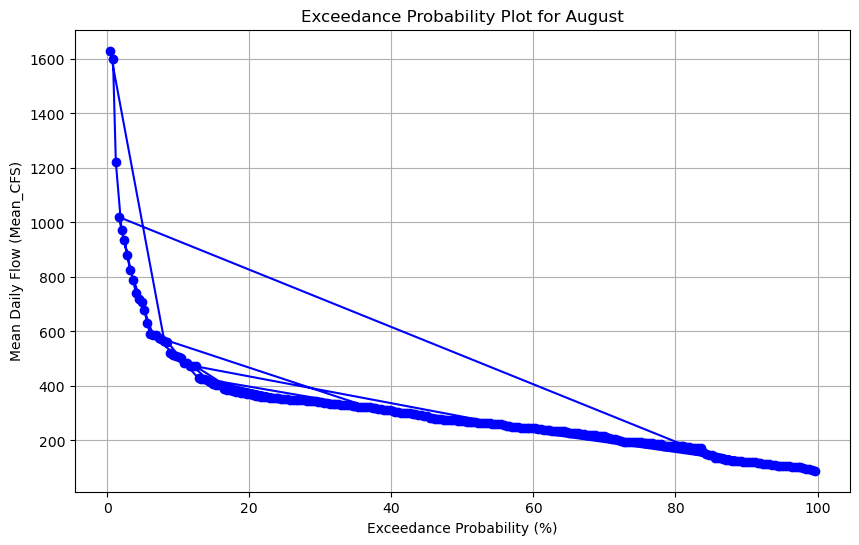

220.0


In [25]:
CCDF_aug_avg_daily_exceedance_flow('wallstreet_aug_data')